<a href="https://colab.research.google.com/github/Shreyas-Hegde10/Fake-News-Detector/blob/main/Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
import plotly.express as px
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Importing Dataset & Editing It

In [ ]:
news_df = pd.read_csv('News.csv',index_col=0)
news_df.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [ ]:
news_df.shape

(44919, 5)

In [ ]:
news_df = news_df.drop(["title","subject", "date"], axis = 1)


In [ ]:
news_df.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [ ]:
news_df.isnull().sum() # No null values

,0
text,0
class,0


In [ ]:
news_df = news_df.sample(frac=1, random_state=42).reset_index(drop=True)
news_df

,text,class
0,"BROWNSVILLE, Texas (Reuters) - The rust-colore...",1
1,WASHINGTON (Reuters) - U.S. senators stressed ...,1
2,"Taya Kyle, the widow of infamous American Sni...",0
3,"After last week s election, Hillary supporters...",0
4,SYDNEY (Reuters) - Australia will not be allow...,1
...,...,...
44914,,0
44915,TOKYO (Reuters) - Japan s defense ministry on ...,1
44916,HARARE (Reuters) - Zimbabwe s army appears to ...,1
44917,Jesus f*cking Christ our President* is a moron...,0


In [ ]:
px.histogram(news_df,x="class", color="class")

Data Preprocessing

In [ ]:
# Function for removing stopwords, whitespaces, lowercasing, and removing unnecessary characters
def preprocess_text(text_data):
  preprocessed_text=[]

  for sentence in tqdm(text_data):
    re.sub(r'[^\w\s]', '', sentence)
    preprocessed_text.append(' '.join(token.lower()
    for token in str(sentence).split()
    if token not in stopwords.words('english')))

  return preprocessed_text

In [ ]:
preprocessed_review = preprocess_text(news_df['text'].values)
news_df['text'] = preprocessed_review

100%|██████████| 44919/44919 [30:07<00:00, 24.85it/s]


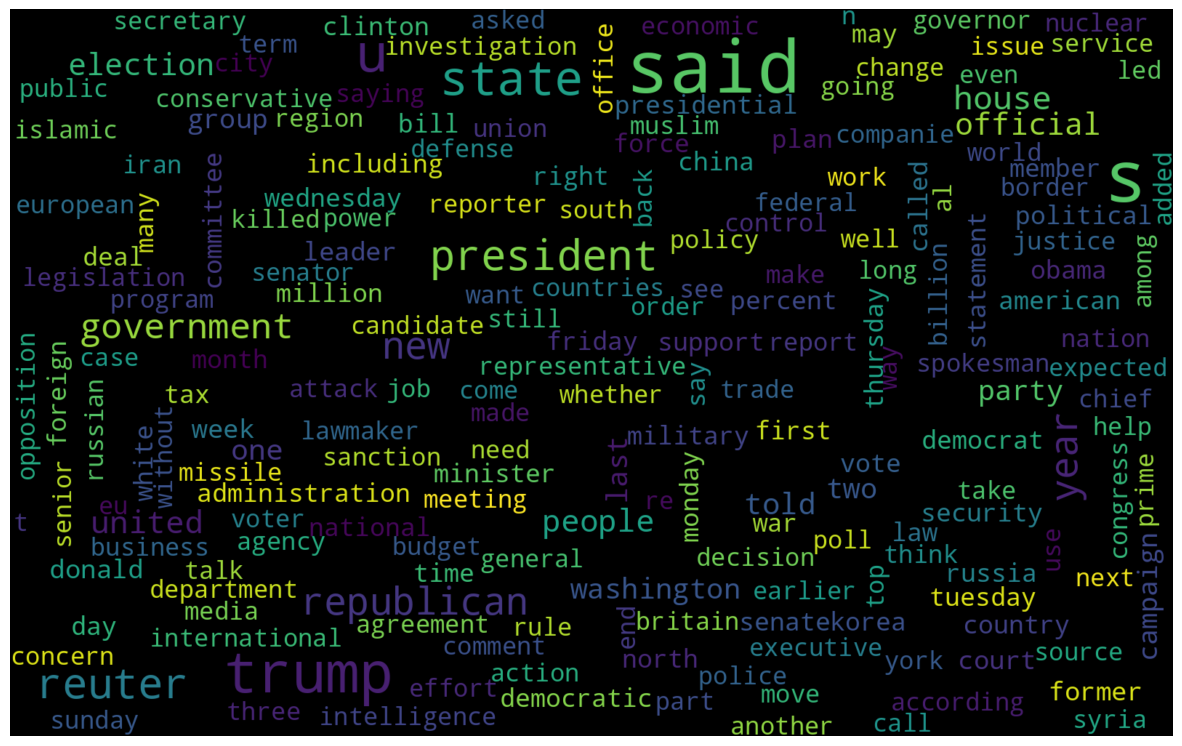

In [ ]:
# Word Cloud for True Articles
frequent_words = ' '.join(word for word in news_df['text'][news_df["class"] == 1].astype(str))
word_cloud = WordCloud(width=1600,height=1000, random_state=42, max_font_size=100, collocations=False)

plt.figure(figsize=(15,10))
plt.imshow(word_cloud.generate(frequent_words), interpolation='bilinear')
plt.axis('off')
plt.show()

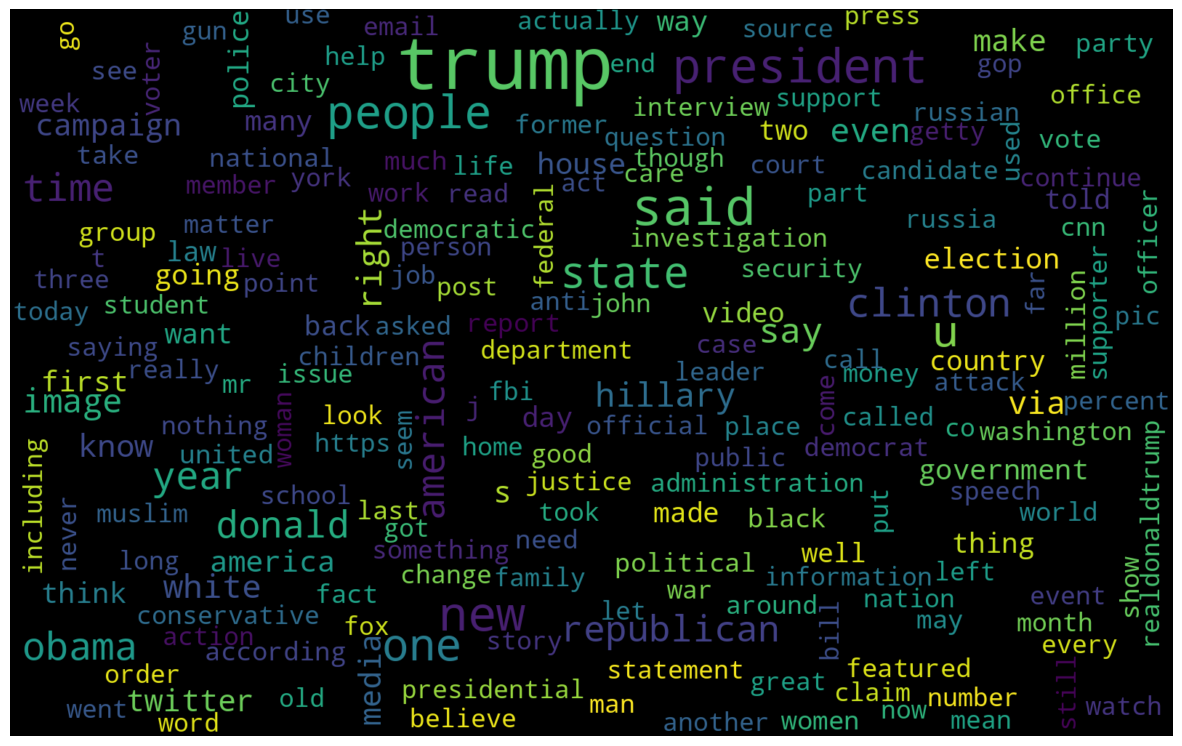

In [ ]:
# Word Cloud for Fake Articles
frequent_words = ' '.join(word for word in news_df['text'][news_df["class"] == 0].astype(str))
word_cloud = WordCloud(width=1600,height=1000, random_state=42, max_font_size=100, collocations=False)

plt.figure(figsize=(15,10))
plt.imshow(word_cloud.generate(frequent_words), interpolation='bilinear')
plt.axis('off')
plt.show()

Creating the Model + Vectorization

In [ ]:
x_train,x_test,y_train, y_test = train_test_split(news_df["text"],news_df["class"], test_size= 0.25)

In [ ]:
vectorizer = TfidfVectorizer()
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.fit_transform(x_test)

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9923120306331443


ValueError: X has 67398 features, but LogisticRegression is expecting 108551 features as input.